In [23]:
import pandas as pd
import re

df = pd.read_csv("../data/raw/kolesa_ads.csv")
df.head()


,title,price,description,city,views,url
0,ВАЗ (Lada) Lada 2121,2 000 000₸,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП м...",Алматы,0,https://kolesa.kz/a/show/207117446?search_id=9...
1,Mitsubishi Delica,8 500 000₸,"1995 г., Б/у минивэн, 3 л, бензин, Правый руль...",Алматы,0,https://kolesa.kz/a/show/205868127?search_id=9...
2,BMW 528,6 500 000₸,"2012 г., Б/у седан, 2 л, бензин, КПП автомат, ...",Караганда,0,https://kolesa.kz/a/show/206593170?search_id=9...
3,Toyota Camry,6 050 000₸,"2011 г., Б/у седан, 2.5 л, бензин, КПП автомат...",Актау,0,https://kolesa.kz/a/show/207108864?search_id=9...
4,Mazda 626,1 800 000₸,"1998 г., Б/у универсал, 1.8 л, бензин, КПП мех...",Шымкент,0,https://kolesa.kz/a/show/207105826?search_id=9...


In [24]:
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2020 non-null   object
 1   price        2020 non-null   object
 2   description  2020 non-null   object
 3   city         2020 non-null   object
 4   views        2020 non-null   int64 
 5   url          2020 non-null   object
dtypes: int64(1), object(5)
memory usage: 94.8+ KB


title          0
price          0
description    0
city           0
views          0
url            0
dtype: int64

In [25]:
df = df.drop_duplicates(subset=["url"])
print("После удаления дублей:", len(df))


После удаления дублей: 2020


In [26]:
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("₸", "", regex=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)
df["views"] = (
    df["views"]
    .astype(str)
    .str.replace(" ", "", regex=False)
    .replace("None", 0)
    .astype(int)
)

df = df.dropna(subset=["price", "description", "city"])

df["year"] = (
    df["description"]
    .str.extract(r"(\d{4})")
    .astype(float)
)

df["mileage"] = (
    df["description"]
    .str.extract(r"(\d[\d\s]+)\s*км", expand=False)
    .str.replace(" ", "", regex=False)
    .astype(float)
)

df["engine_l"] = (
    df["description"]
    .str.extract(r"(\d+(?:\.\d+)?)\s*л", expand=False)
    .astype(float)
)

def extract_fuel(text):
    if "бензин" in text:
        return "petrol"
    if "дизель" in text:
        return "diesel"
    if "газ" in text:
        return "gas"
    if "электро" in text:
        return "electric"
    return "other"

df["fuel"] = df["description"].str.lower().apply(extract_fuel)

def extract_gearbox(text):
    if "механика" in text:
        return "manual"
    if "автомат" in text:
        return "automatic"
    if "вариатор" in text:
        return "cvt"
    return "other"

df["gearbox"] = df["description"].str.lower().apply(extract_gearbox)

CURRENT_YEAR = 2025
df["car_age"] = CURRENT_YEAR - df["year"]

df["price_per_year"] = df["price"] / df["car_age"]
df["price_per_km"] = df["price"] / df["mileage"]



In [27]:
df.head()


,title,price,description,city,views,url,year,mileage,engine_l,fuel,gearbox,car_age,price_per_year,price_per_km
0,ВАЗ (Lada) Lada 2121,2000000.0,"2008 г., Б/у внедорожник, 1.7 л, бензин, КПП м...",Алматы,0,https://kolesa.kz/a/show/207117446?search_id=9...,2008.0,160000.0,1.7,petrol,manual,17.0,117647.058824,12.500000
1,Mitsubishi Delica,8500000.0,"1995 г., Б/у минивэн, 3 л, бензин, Правый руль...",Алматы,0,https://kolesa.kz/a/show/205868127?search_id=9...,1995.0,220000.0,3.0,petrol,automatic,30.0,283333.333333,38.636364
2,BMW 528,6500000.0,"2012 г., Б/у седан, 2 л, бензин, КПП автомат, ...",Караганда,0,https://kolesa.kz/a/show/206593170?search_id=9...,2012.0,273000.0,2.0,petrol,automatic,13.0,500000.000000,23.809524
3,Toyota Camry,6050000.0,"2011 г., Б/у седан, 2.5 л, бензин, КПП автомат...",Актау,0,https://kolesa.kz/a/show/207108864?search_id=9...,2011.0,174000.0,2.5,petrol,automatic,14.0,432142.857143,34.770115
4,Mazda 626,1800000.0,"1998 г., Б/у универсал, 1.8 л, бензин, КПП мех...",Шымкент,0,https://kolesa.kz/a/show/207105826?search_id=9...,1998.0,444444.0,1.8,petrol,manual,27.0,66666.666667,4.050004


### EDA

In [28]:
df.describe()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,price,views,year,mileage,engine_l,car_age,price_per_year,price_per_km
count,2.020000e+03,2020.0,2020.000000,1563.000000,1986.000000,2020.000000,2.020000e+03,1.563000e+03
mean,1.143224e+07,0.0,2012.302475,169447.721689,2.441742,12.697525,inf,6.473773e+04
std,1.582509e+07,0.0,9.658667,132899.621292,0.969471,9.658667,NaN,7.370561e+05
min,3.000000e+05,0.0,1985.000000,1.000000,0.800000,-1.000000,-1.520000e+07,8.125000e-01
25%,3.787500e+06,0.0,2006.000000,67000.000000,1.600000,4.000000,2.000000e+05,1.925881e+01
50%,7.400000e+06,0.0,2014.000000,152800.000000,2.300000,11.000000,6.428571e+05,5.000000e+01
75%,1.332500e+07,0.0,2021.000000,240000.000000,3.000000,19.000000,3.635417e+06,2.104688e+02
max,1.980000e+08,0.0,2026.000000,999999.000000,6.200000,40.000000,inf,2.231070e+07


In [ ]:
# Top 10 most expensive cars
df.sort_values("price", ascending=False)[
    ["title", "price", "city", "year"]
].head(10)

,title,price,city,year
735,Mercedes-Benz G 63 AMG 4MATIC,198000000.0,Алматы,2025.0
44,Lamborghini Urus,185500000.0,Алматы,2025.0
149,Land Rover Range Rover,165000000.0,Алматы,2024.0
731,Porsche 911 Carrera 4 GTS,161005164.0,Алматы,2024.0
699,Mercedes-Benz S 63 AMG,140500000.0,Алматы,2024.0
700,Mercedes-Benz S 63 AMG,140500000.0,Алматы,2024.0
382,Mercedes-Benz S 580 4MATIC,140000000.0,Астана,2025.0
1855,Mercedes-Benz G 63 AMG 4MATIC,139000000.0,Астана,2025.0
1865,Mercedes-Benz G 63 AMG 4MATIC,139000000.0,Астана,2025.0
1105,Mercedes-Benz G 63 AMG,132500000.0,Астана,2022.0


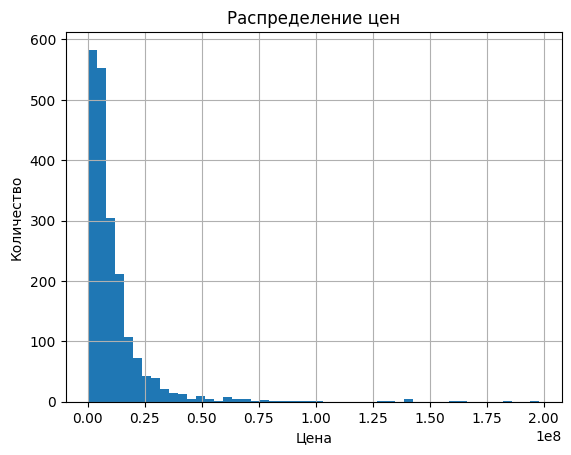

In [30]:
import matplotlib.pyplot as plt

plt.figure()
df["price"].hist(bins=50)
plt.title("Распределение цен")
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.show()


In [31]:
df.groupby("city")["price"].mean().sort_values(ascending=False).head(10)


city
Астана           1.543076e+07
Туздыбастау      1.450000e+07
Петропавловск    1.404968e+07
Алматы           1.338713e+07
Кокшетау         1.277333e+07
Кызылорда        1.194172e+07
Лисаковск        1.170000e+07
Тараз            1.158212e+07
Бейнеу           1.050000e+07
Шымкент          1.045900e+07
Name: price, dtype: float64

In [32]:
df[["price", "year", "mileage", "engine_l", "views"]].corr()


,price,year,mileage,engine_l,views
price,1.000000,0.433307,-0.389364,0.390991,NaN
year,0.433307,1.000000,-0.684403,-0.099318,NaN
mileage,-0.389364,-0.684403,1.000000,0.068118,NaN
engine_l,0.390991,-0.099318,0.068118,1.000000,NaN
views,NaN,NaN,NaN,NaN,NaN


### Обнаружение аномалий (overpriced)

In [33]:
from scipy.stats import zscore

df["price_z"] = zscore(df["price"])
outliers = df[df["price_z"] > 3]
outliers.head()

,title,price,description,city,views,url,year,mileage,engine_l,fuel,gearbox,car_age,price_per_year,price_per_km,price_z
29,Toyota Land Cruiser,68500000.0,"2025 г., Б/у внедорожник, 3.5 л, бензин, КПП а...",Астана,0,https://kolesa.kz/a/show/203881009?search_id=9...,2025.0,20000.0,3.5,petrol,automatic,0.0,inf,3425.000000,3.607050
44,Lamborghini Urus,185500000.0,"На заказ,2025 г., новый кроссовер, 4 л, бензин...",Алматы,0,https://kolesa.kz/a/show/207197433?search_id=0...,2025.0,NaN,4.0,petrol,automatic,0.0,inf,NaN,11.002204
149,Land Rover Range Rover,165000000.0,"2024 г., Б/у внедорожник, 4.4 л, бензин, КПП а...",Алматы,0,https://kolesa.kz/a/show/191542921?search_id=5...,2024.0,NaN,4.4,petrol,automatic,1.0,1.650000e+08,NaN,9.706472
248,Mercedes-Benz G 63 AMG,97000000.0,"2020 г., Б/у внедорожник, 4 л, бензин, КПП авт...",Алматы,0,https://kolesa.kz/a/show/201235335?search_id=a...,2020.0,50000.0,4.0,petrol,automatic,5.0,1.940000e+07,1940.000000,5.408433
249,Mercedes-Benz GLC Coupe 63 AMG,60000000.0,"2018 г., Б/у кроссовер, 4 л, бензин, КПП автом...",Алматы,0,https://kolesa.kz/a/show/206274102?search_id=a...,2018.0,92000.0,4.0,petrol,automatic,7.0,8.571429e+06,652.173913,3.069795


In [34]:
features = [
    "price",
    "year",
    "mileage",
    "engine_l",
    "fuel",
    "gearbox",
    "city",
    "views",
    "car_age",
    "price_per_km"
]

df_ml = df[features]
df_ml.head()


,price,year,mileage,engine_l,fuel,gearbox,city,views,car_age,price_per_km
0,2000000.0,2008.0,160000.0,1.7,petrol,manual,Алматы,0,17.0,12.500000
1,8500000.0,1995.0,220000.0,3.0,petrol,automatic,Алматы,0,30.0,38.636364
2,6500000.0,2012.0,273000.0,2.0,petrol,automatic,Караганда,0,13.0,23.809524
3,6050000.0,2011.0,174000.0,2.5,petrol,automatic,Актау,0,14.0,34.770115
4,1800000.0,1998.0,444444.0,1.8,petrol,manual,Шымкент,0,27.0,4.050004


In [35]:
df.to_csv("../data/processed/kolesa_cleaned.csv", index=False, encoding="utf-8-sig")
df_ml.to_csv("../data/processed/kolesa_ml_ready.csv", index=False, encoding="utf-8-sig")

print("✅ Данные сохранены")


✅ Данные сохранены
